In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("mymovie_db.csv")

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9832,15-10-1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,01-10-2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,06-05-2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,5,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,31-03-2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9836,23-09-1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [7]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   object 
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 767.7+ KB


In [11]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,Popularity
count,9826.000000
mean,40.323951
std,108.879332
min,13.354000
25%,16.128250
50%,21.195000
75%,35.179250
max,5083.954000


**Exploration Summary**

In [14]:
#1. we have a dataframe consisting of 9827 rows and 9 columns.
#2. Our dataset looks a bit tidy with no NaNs nor duplicated values.
#3. Release_Date Column needs to casted into date time  and to extract only the year value.
#4. Vote_Count & Vote_Average columns needs to casted into int and float respectively
#4. Overview, original_language and poster_URL would not be so useful during analysis, so we'll drop them.
#5. There is noticable outliers in popularity column.
#6. Vote_Average better be categorised for proper analysis.
#7. Genre column has comma seperated values and white spaces that needs to be handled  and casted into category .                                  

In [15]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [16]:
df["Vote_Count"] = df["Vote_Count"].replace(" ", "0")
df["Vote_Count"] = df["Vote_Count"].replace("en", "0")
df["Vote_Count"] = df["Vote_Count"].astype(int)

In [17]:
df["Vote_Average"] = df["Vote_Average"].replace(" ", "0")
df["Vote_Average"] = df["Vote_Average"].replace("Animation", "0")
df["Vote_Average"] = df["Vote_Average"].astype(float)

In [18]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 767.7+ KB


In [20]:
df['Release_Date']=df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [21]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [22]:
cols=['Overview','Original_Language','Poster_Url']

In [23]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

***Categorize vote_Average column***

**We would cut the Vote_Average values and make 4 categories : Popular,Average, Below_avg, not popular to describe it more using categorize_col() function provided above.**           

In [24]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [25]:
labels=['not_popular','below_avg', 'average','popular']

categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [27]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [28]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

**We had split genres into a list and then explode our dataframe to have only one genre per row for each movie.**

In [29]:
df['Genre']=df['Genre'].str.split(', ')

df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [30]:
# casting column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [32]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


## Data Visualization

In [34]:
sns.set_style('whitegrid')

**Q1. What is the most frequent genre of movies released on Netflix?**

In [35]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

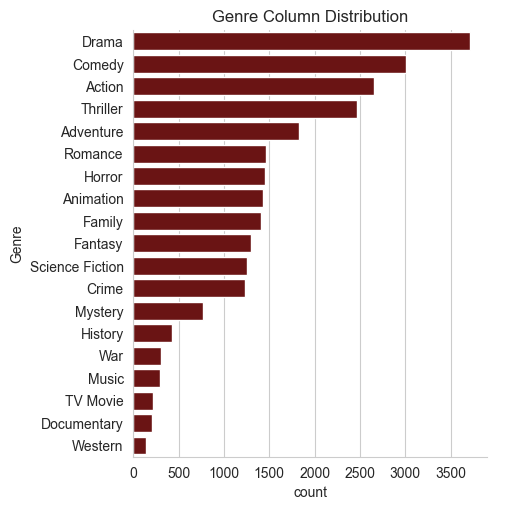

In [36]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color='#780606')
plt.title("Genre Column Distribution")
plt.show()

**Which has highest votes in vote avg column?**

In [37]:
df['Vote_Average'].describe()

count       25551
unique          4
top       average
freq         6612
Name: Vote_Average, dtype: object

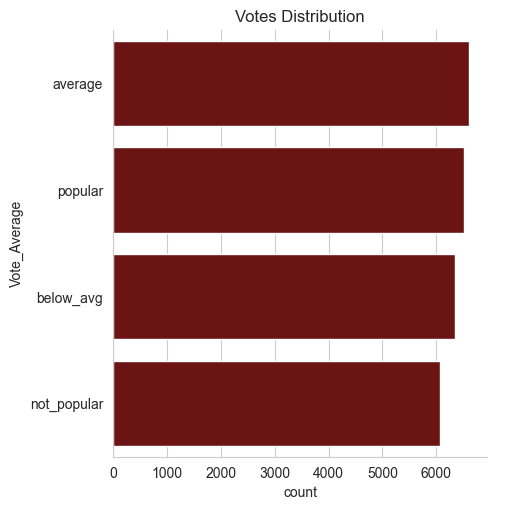

In [39]:
sns.catplot(y='Vote_Average',data=df,kind='count',
           order=df['Vote_Average'].value_counts().index,
            color='#780606')
plt.title("Votes Distribution")
plt.show()

**What movie got the highest popularity? what is its genre?**

In [216]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [217]:
df_filtered_1=df[df['Popularity']==df['Popularity'].max()]

In [218]:
df_filtered_1=df_filtered_1[['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre']]

In [219]:
df_filtered_1

,Title,Popularity,Vote_Count,Vote_Average,Genre
0,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**What movie got the lowest popularity? what is its genre?**

In [220]:
df_filtered_2=df[df['Popularity']==df['Popularity'].min()]

In [221]:
df_filtered_2=df_filtered_2[['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre']]

In [222]:
df_filtered_2

,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,The United States vs. Billie Holiday,13.354,152,average,Music
25546,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,The United States vs. Billie Holiday,13.354,152,average,History
25548,Threads,13.354,186,popular,War
25549,Threads,13.354,186,popular,Drama
25550,Threads,13.354,186,popular,Science Fiction


**Which year has the most filmed movies?**

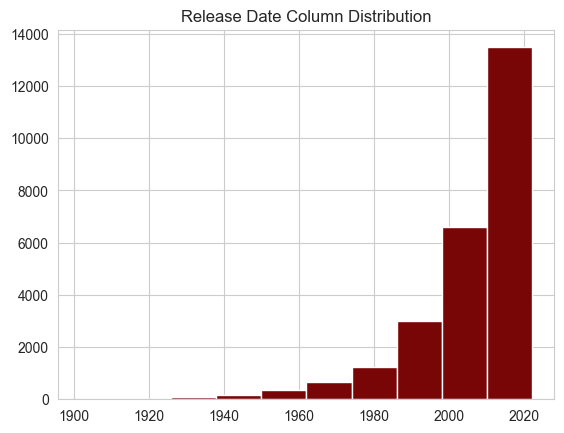

In [41]:
df['Release_Date'].hist(color='#780606')
plt.title("Release Date Column Distribution")
plt.show()

**CONCLUSIONS**

**Q1. What is the most frequent genre of movies released on Netflix?**

**Drama Genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other Genres.**

**Q2.Which has highest votes in vote avg column?**

**The average category has the highest number of votes in the "Vote_Average" column.average has the highest votes, with a count of approximately 6,200.**

**3.What movie got the highest popularity? what's its genre?**

**Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.**

**4.What movie got the lowest popularity? what's its genre?**

**The United States vs. Billie Holiday, Threads has the the lowest popularity in our dataset and it has genres of Music,Drama,History,War,Drama and Science Fiction.**

**5.Which year has the most filmmed movies?**

**year 2020 has the highest filmmed rate in our dataset.**